<a href="https://colab.research.google.com/github/maazansariX/maazansariX/blob/main/Python_Case_Study_Domain_Analytics_Credit_EDA_%26_Credit_Score_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit EDA & Credit Score Calculation**

**Problem statement:**

To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

**Dataset Link:**
https://drive.google.com/file/d/1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA/view?usp=sharing

**Data Dictionary Link:**
https://docs.google.com/spreadsheets/d/1ZuK6o1MXFLmnhkFuDEedasDfVqu9ISPV/edit#gid=688359417

**Expectations:**
The project expects a deep dive into bank details and credit data, creating valuable features, a hypothetical credit score, and uncovering hidden patterns. This involves thorough EDA, strategic feature engineering, model-driven score calculation, and insightful analysis that reveals factors influencing creditworthiness and guides potential risk mitigation strategies.

**Approach by Maaz Ansari:**

**Exploratory Data Analysis (EDA):**
Perform a comprehensive EDA to understand the data's structure, characteristics, distributions, and relationships.
Identify and address any missing values, mismatch data types, inconsistencies, or outliers.
Utilize appropriate visualizations (e.g., histograms, scatter plots, box plots, correlation matrices) to uncover patterns and insights.

**Feature Engineering:**
Create new features that can be leveraged for the calculation of credit scores based on domain knowledge and insights from EDA.
Aggregate the data on the customer level if required
Hypothetical Credit Score Calculation:

Develop a methodology to calculate a hypothetical credit score using relevant features(use a minimum of 5 maximum of 10 features).
Clearly outline the developed methodology in the notebook, providing a detailed explanation of the reasoning behind it. (use inspiration from FICO scores and try to use relevant features you created)
Explore various weighting schemes to assign scores.
Provide a score for each individual customer

**Analysis and Insights:**
Add valuable insights from EDA and credit score calculation
Can credit score and aggregated features be calculated at different time frames like the last 3 months/last 6 months (recency based metrics)

Remember, your analysis isn't just about dissecting data but uncovering actionable insights. Create a credit score strategy that you think would be the best and mention your justifications for criteria, weightage for the features.
Suggestions are just general guidelines for the projects. It is not limited by that but serves as a starter and keeps it open to let you explore more, go into as much depth as you can, and actually make it your own project.

**Schema of Data:**

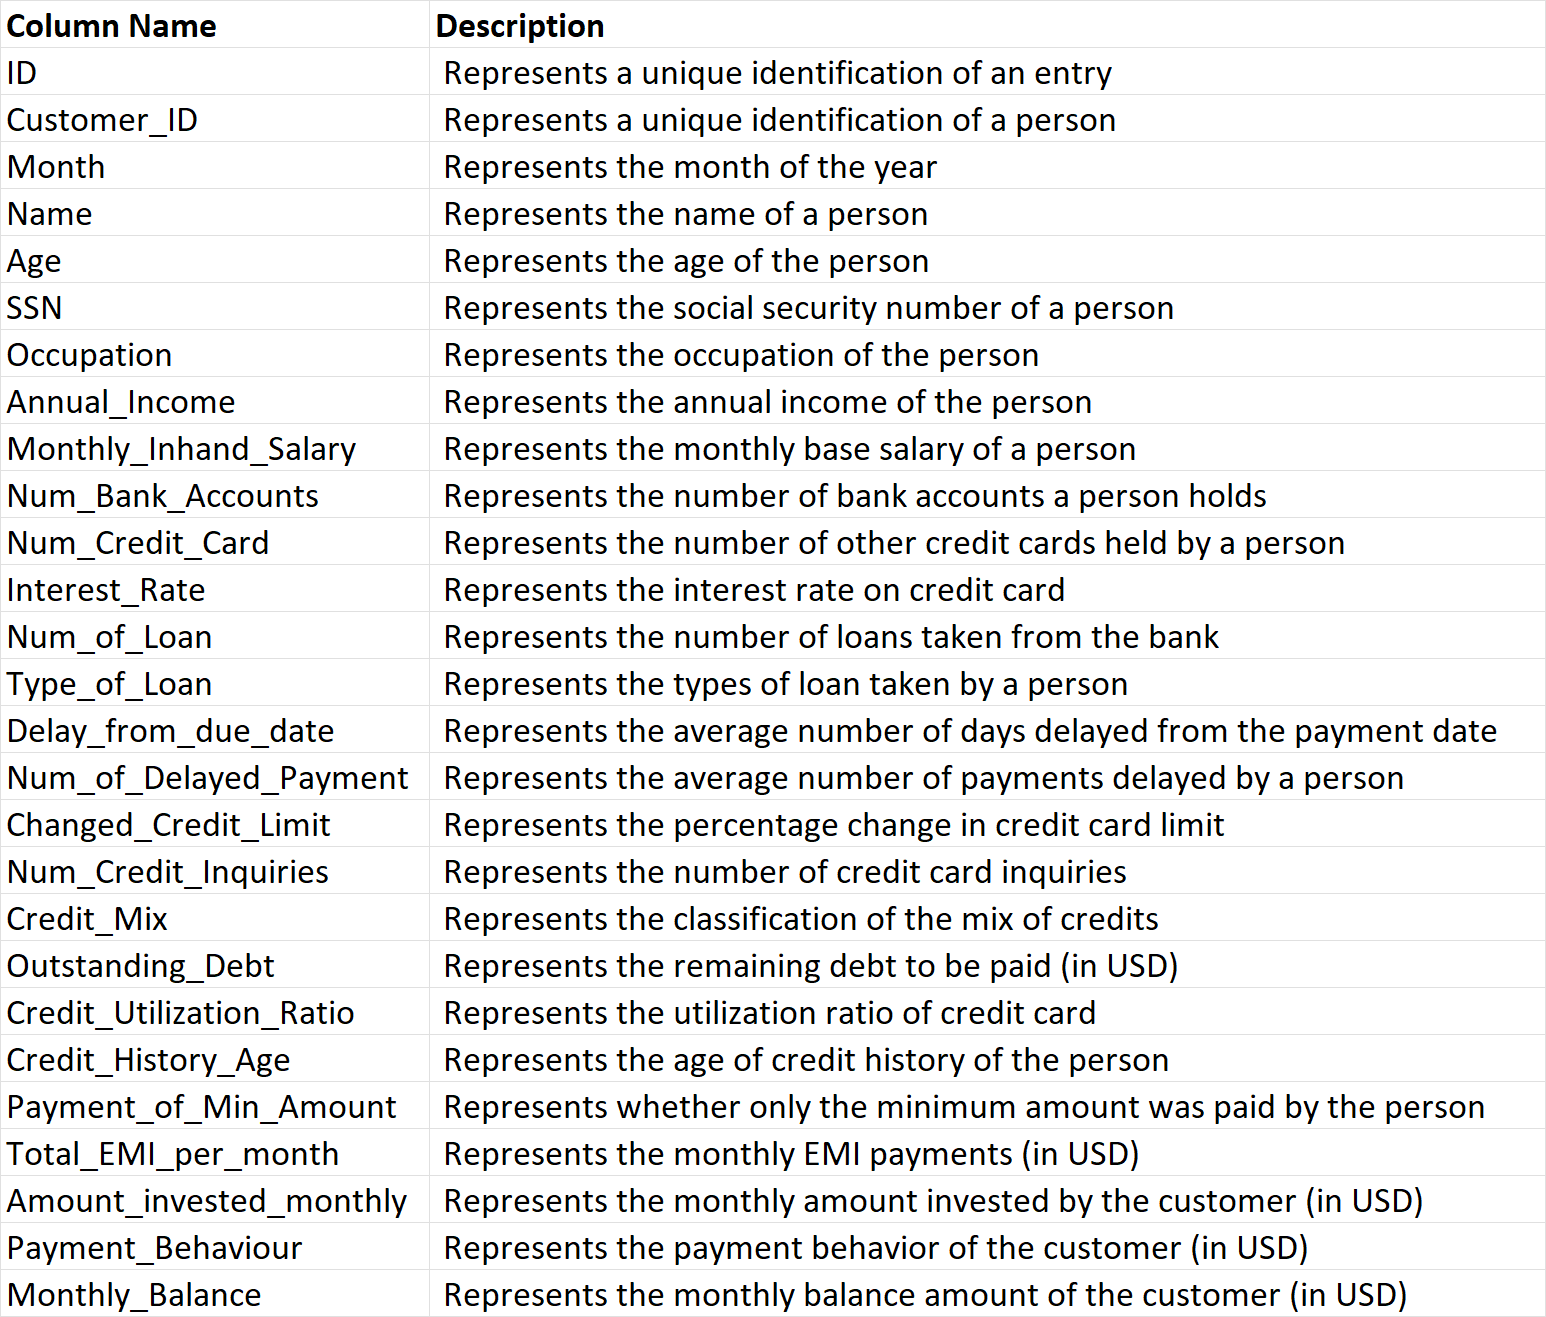

**1. Import Libraries**

In [261]:
import numpy as np
import pandas as pd

#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

**2. Import & Read Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Credit_score.csv to Credit_score.csv


In [9]:
data = pd.read_csv("Credit_score.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [10]:
data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638652,!@9#%8,393.673696


**3. EDA - Exploratory Data Analysis**

EDA refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the **categorical columns** of the dataset - and the **numerical columns** of the dataset -

In [7]:
data.shape

(100000, 27)

**3.1 Datatypes, Missing Data, and Summary Statistics**

**Shape of the Dataset:**

- Columns: 27
- Rows: 100,000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Observations:**

- There are missing values in the dataset
- Dataset has both numerical and string values in columns
- Some data types are incorrectly assigned

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.00000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.00000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.00000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.00000


In [15]:
data.describe(exclude = np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


**Observations:**

- As per Customer_ID column, data has 12500 unique customers.
- Strange but month has only 8 unique values vs. 12. Need to analyze further.
- Age has 1788 unique values which is again illogical as age is generally between 0 - 100.
- SSN has 12501 values vs customers value being 12500. Seems one of the customers has distinct SSNs which is likely to be data quality issue.
- SSN values are some multiple character values which seems to be junk.
- Data clean-up is required to remove unwanted and mis-aligned values in certain columns.

**3.2. Data clean-up of missing values, inconsistency, mismatch and outliers**

In [16]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

**Column : Name**

In [17]:
data.sort_values(by = ['Customer_ID','Month'], inplace = True)

In [20]:
data['Name'] = data.groupby('Customer_ID')['Name'].fillna(method = 'ffill').fillna(method = 'bfill')

**Column: Age**

In [25]:
data['Age'].value_counts()

Age
38       2833
28       2829
31       2806
26       2792
32       2749
         ... 
2204        1
2474_       1
620         1
6922        1
6494        1
Name: count, Length: 1788, dtype: int64

In [34]:
data['Age'] = data['Age'].where((data['Age'] >= 0) & (data['Age'] <= 120), pd.NA)
data['Age'] = data.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [37]:
data['Age'] = data.groupby('Customer_ID')['Age'].transform(lambda x: x.replace(x.max(),x.mode().iloc[0]))
data['Age'] = data.groupby('Customer_ID')['Age'].transform(lambda x: x.replace(x.min(),x.mode().iloc[0]))

In [38]:
data['Age']= data['Age'].astype(int)

In [40]:
data['Age'].unique()

array([17, 26, 18, 44, 27, 15, 51, 30, 40, 37, 50, 20, 41, 46, 24, 54, 32,
       38, 14, 43, 22, 55, 45, 29, 48, 35, 39, 25, 19, 36, 21, 31, 42, 23,
       28, 33, 49, 34, 53, 52, 47, 16, 56])

In [42]:
data['Age'].nunique()

43

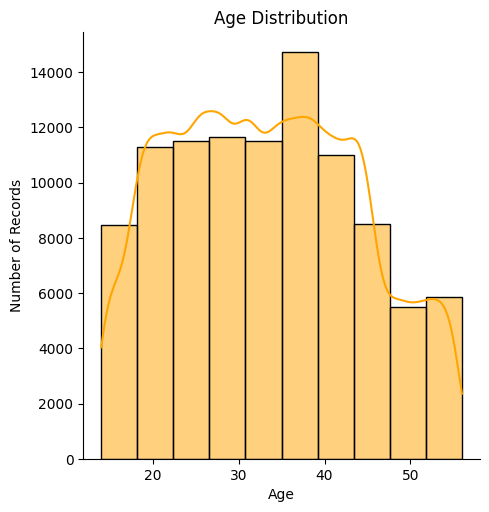

In [85]:
sns.displot(data=data, x=data['Age'], kde=True, bins = 10, color = 'orange')
plt.xlabel('Age')
plt.ylabel('Number of Records')
plt.title('Age Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary:**

- There were **1788** unique values in Age column which was cleaned up to arrive at **43** unique age values.

**Column : SSN**

In [48]:
data['SSN'].value_counts()

SSN
#F%$D@*&8      5572
913-74-1218       8
196-69-7786       8
971-11-8511       8
276-64-8276       8
               ... 
838-33-4811       4
286-44-9634       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
Name: count, Length: 12501, dtype: int64

In [49]:
data['SSN'] = data['SSN'].str.replace('_', '')

In [55]:
def replace_irregular_ssn(group):
  actual_ssn = group.loc[group['SSN'] != '#F%$D@*&8', 'SSN'].iloc[0]
  group_ssn = group.loc[group['SSN'] == '#F%$D@*&8', 'SSN'] = actual_ssn
  return group
data = data.groupby('Customer_ID').apply(replace_irregular_ssn).reset_index(drop=True)

In [56]:
data['SSN'].value_counts()

SSN
913-74-1218    8
523-90-6933    8
236-25-0124    8
331-24-3360    8
311-38-7874    8
              ..
360-58-3081    8
341-94-5301    8
702-76-0398    8
282-99-1365    8
832-88-8320    8
Name: count, Length: 12500, dtype: int64

In [61]:
data['SSN'].nunique()

12500

In [59]:
data[data['SSN']=='#F%$D@*&8']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


**Summary:**

- **5572** entries were garbage data
- Now unique values are normalized to **12500** which is equal unique customers in the dataset.

**Column: Occupation**

In [62]:
data['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [66]:
data['Occupation'].str.get_dummies().sum(axis = 1).value_counts()[2:]

Series([], Name: count, dtype: int64)

In [74]:
def replace_underscore_occupation(group):
    mode_occupation = group['Occupation'].mode().iloc[0]
    if mode_occupation != '_______':
        group['Occupation'] = group['Occupation'].replace('_______', mode_occupation)
    else:
        non_underscore_modes = group['Occupation'][group['Occupation'] != '_______'].mode()
        if not non_underscore_modes.empty:
            non_underscore_mode = non_underscore_modes.iloc[0]
            group['Occupation'] = group['Occupation'].replace('_______', non_underscore_mode)

    return group
data = data.groupby('Customer_ID').apply(replace_underscore_occupation).reset_index(drop=True)

In [75]:
data['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [76]:
data['Occupation'].nunique()

15

**Summary:**

- From the original data, we had **7062** junk values which were cleaned to now have **15** unique Occupation categories.

**Column: Annual Income**

In [77]:
data['Annual_Income'] = data['Annual_Income'].str.replace('_', '')
data['Annual_Income'] = data['Annual_Income'].astype(float)

In [78]:
data['Annual_Income'].isna().sum()

0

In [79]:
data['Annual_Income'] = data.groupby('Customer_ID')['Annual_Income'].transform(lambda x: x.mode().iloc[0])

In [80]:
data['Annual_Income'].max()

179987.28

In [81]:
data['Annual_Income'].min()

7005.93

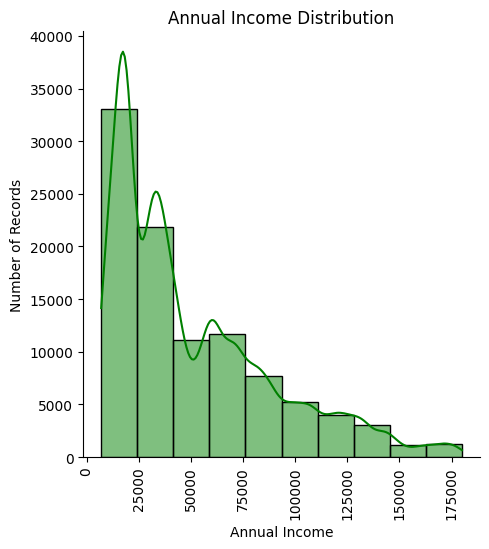

In [87]:
sns.displot(data=data, x=data['Annual_Income'], kde=True, bins=10, color = 'green')
plt.xlabel('Annual Income')
plt.ylabel('Number of Records')
plt.title('Annual Income Distribution')
plt.xticks(rotation= 90)
plt.show()

**Summary:**

- Annual income has been cleaned up. Large number of customers have Annual income between **25 to 50 K**. Distribution of Annual Income is **right skewed**.

**Column: Monthly_Inhand_Salary**

In [88]:
data['Monthly_Inhand_Salary'].value_counts()

Monthly_Inhand_Salary
6358.956667     15
6082.187500     15
6769.130000     15
2295.058333     15
3080.555000     14
                ..
440.040880       1
9322.687972      1
13102.045570     1
10015.673330     1
8836.177500      1
Name: count, Length: 13235, dtype: int64

In [89]:
nan_count_by_customer = data.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.isna().sum())
nan_count_by_customer.value_counts()

Monthly_Inhand_Salary
1    4862
0    3401
2    2904
3    1048
4     240
5      42
6       3
Name: count, dtype: int64

In [90]:
data.sort_values(by=['Customer_ID', 'Month'], inplace=True)
data['Monthly_Inhand_Salary'] = data.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill').fillna(method='bfill')

In [91]:
data['Monthly_Inhand_Salary'].isna().sum()

0

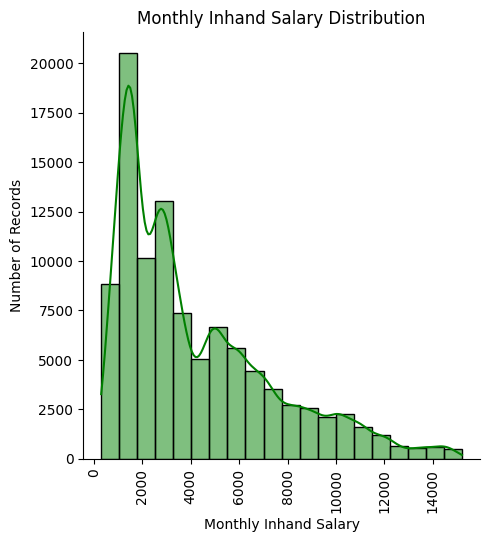

In [93]:
sns.displot(data= data, x= data['Monthly_Inhand_Salary'], kde=True, bins = 20, color = 'green')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Number of Records')
plt.title('Monthly Inhand Salary Distribution')
plt.xticks(rotation=90)
plt.show()

**Summary:**

- **Null values** are filled using **forward fill** and **backfill** function from python. **No outliers** visible in this column and also this data is **right skewed** again and aligned with Annual Income of customer with most of the monthly income is on **lower side** for most of them i.e. between **1.5K to 3.5K**

**Column: Num_Bank_Accounts**

In [94]:
data['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
795         1
1252        1
935         1
1350        1
796         1
Name: count, Length: 943, dtype: int64

In [97]:
grouped_modes = data.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.mode().iloc[0])
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].mask(data['Num_Bank_Accounts'] != data['Customer_ID'].map(grouped_modes), data['Customer_ID'].map(grouped_modes))
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].apply(lambda x: 1 if x <= 0 else x)

In [98]:
data['Num_Bank_Accounts'].value_counts().sort_values()

Num_Bank_Accounts
2      4352
10     5328
9      5512
1      8952
3     12096
5     12272
4     12392
8     12936
7     12976
6     13184
Name: count, dtype: int64

In [104]:
data['Num_Bank_Accounts'].nunique()

10

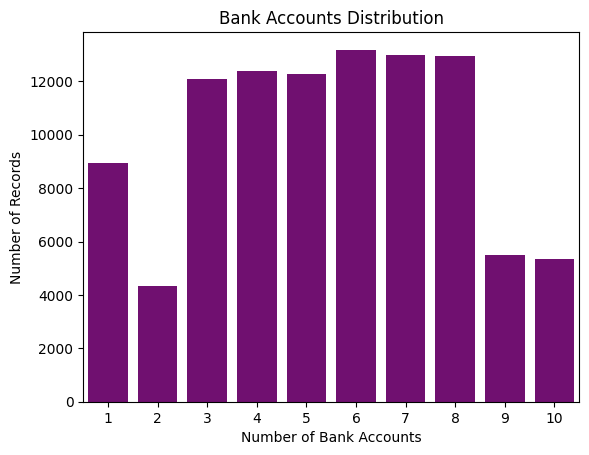

In [110]:
sns.countplot(data= data, x= data['Num_Bank_Accounts'], color = 'purple')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Number of Records')
plt.title('Bank Accounts Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary:**

- Original data had **some outliers**, **negative values** which were cleaned up. Total no. of unique values for Number of Bank accounts are **10**. Majority of customers had Number of accounts between **3-8**.

**Column: Num_Credit_Card**

In [105]:
data['Num_Credit_Card'].value_counts()

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
422         1
62          1
1348        1
819         1
1108        1
Name: count, Length: 1179, dtype: int64

In [107]:
grouped_modes = data.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.mode().iloc[0])
data['Num_Credit_Card'] = data.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Num_Credit_Card'] != grouped_modes[row['Customer_ID']] else row['Num_Credit_Card'], axis=1)

In [108]:
data['Num_Credit_Card'].value_counts().sort_values(ascending=True)

Num_Credit_Card
0        16
11       40
1      2184
2      2208
9      4736
10     4960
8      5096
3     13576
4     14336
6     16960
7     16984
5     18904
Name: count, dtype: int64

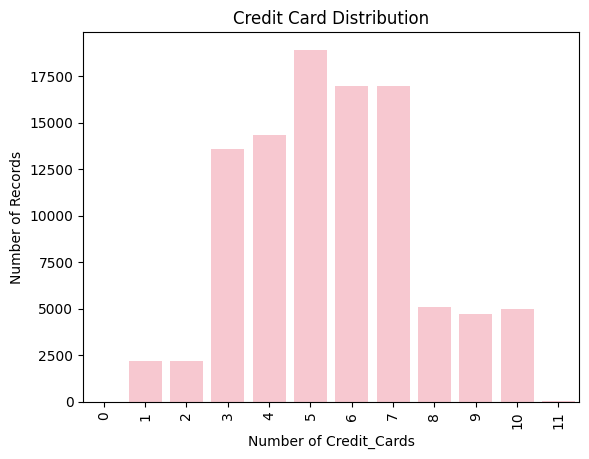

In [111]:
sns.countplot(data=data, x=data['Num_Credit_Card'], color = "pink")
plt.xlabel('Number of Credit_Cards')
plt.ylabel('Number of Records')
plt.title('Credit Card Distribution')
plt.xticks(rotation=90)
plt.show()

**Summary:**

- There were outliers in the data with **1179** unique values which was cleaned up to arrive at **12 unique categories**. Maximum number of customers fall into holding **3-7** credit cards.

**Column: Interest_Rate**

In [112]:
data['Interest_Rate'].value_counts()

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
295        1
3395       1
4323       1
3225       1
3808       1
Name: count, Length: 1750, dtype: int64

In [113]:
grouped_modes = data.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.mode().iloc[0])
data['Interest_Rate'] = data.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Interest_Rate'] != grouped_modes[row['Customer_ID']] else row['Interest_Rate'], axis=1)


In [114]:
data['Interest_Rate'].value_counts().sort_values(ascending=True)

Interest_Rate
31    1488
33    1496
34    1528
26    1528
21    1592
25    1608
27    1640
28    1648
29    1696
23    1720
30    1728
24    1736
22    1752
32    1776
14    2272
13    2432
2     2520
4     2640
1     2744
3     2824
19    3704
16    3800
17    3888
20    4008
15    4072
18    4192
11    4512
9     4576
7     4584
10    4616
12    4648
6     4832
5     5096
8     5104
Name: count, dtype: int64

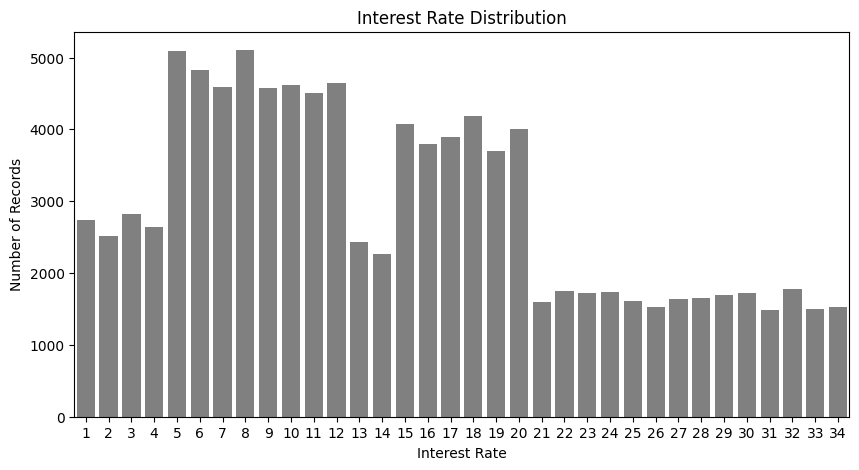

In [119]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x= data['Interest_Rate'], color = "grey")
plt.xlabel('Interest Rate')
plt.ylabel('Number of Records')
plt.title('Interest Rate Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary:**

- There were **outliers** in the data which upon clean-up gave **Interest Rates in the range of 1% - 34%**.

**Column: Num_of_Loan**

In [120]:
data['Num_of_Loan'].unique()

array(['2', '1094', '4', '4_', '0', '0_', '3', '8', '-100', '8_', '1',
       '1_', '9', '7', '1222', '6', '5', '119', '3_', '6_', '2_', '9_',
       '143_', '7_', '5_', '1150', '351', '52', '95', '614', '504',
       '1241', '1496', '17', '966', '330', '290', '193', '520', '50',
       '1265', '352', '571', '190', '995', '55', '433', '590', '661',
       '313', '1027_', '92_', '1017', '904', '1132_', '1008', '49', '737',
       '546', '1096', '1461', '548', '939', '243', '1014', '924', '526',
       '1447', '1228', '1129', '968', '285', '1484', '716', '1236', '801',
       '809', '137', '208', '875', '1187', '621', '350', '911', '1023',
       '855', '802', '967', '1296', '640', '1131_', '639', '1365', '254',
       '1040', '141', '349', '659', '1480', '1259', '889', '70', '344',
       '898', '41', '1412', '1353', '720', '1154', '295', '238', '100',
       '54', '237', '868', '1214', '873', '33', '895', '1482', '1384',
       '182', '1289', '439', '563', '31', '597', '649', '1053', '

In [121]:
data['Num_of_Loan'] = data['Num_of_Loan'].str.replace('_', '')
data['Num_of_Loan'] = data['Num_of_Loan'].str.replace('-', '')
data['Num_of_Loan'] = data['Num_of_Loan'].astype(int)

In [122]:
data['Num_of_Loan'].value_counts()

Num_of_Loan
3      15104
2      15032
4      14743
0      10930
1      10606
       ...  
860        1
510        1
438        1
571        1
472        1
Name: count, Length: 413, dtype: int64

In [123]:
grouped_modes = data.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.mode().iloc[0])
data['Num_of_Loan'] = data.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Num_of_Loan'] != grouped_modes[row['Customer_ID']] else row['Num_of_Loan'], axis=1)

In [124]:
data['Num_of_Loan'].value_counts()

Num_of_Loan
3    15752
2    15712
4    15456
0    11408
1    11128
6     8144
7     7680
5     7528
9     3856
8     3336
Name: count, dtype: int64

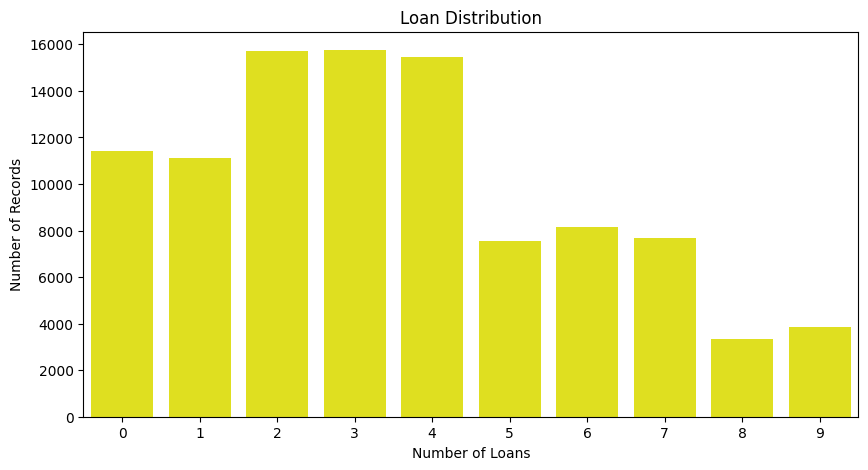

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x=data['Num_of_Loan'], color = 'yellow')
plt.xlabel('Number of Loans')
plt.ylabel('Number of Records')
plt.title('Loan Distribution')
plt.xticks(rotation=0)
plt.show()

**Column: Type_of_Loan**

In [138]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                              12816
Credit-Builder Loan                                                                         1280
Personal Loan                                                                               1272
Debt Consolidation Loan                                                                     1264
Student Loan                                                                                1240
                                                                                           ...  
Home Equity Loan, Payday Loan, Credit-Builder Loan, Not Specified, and Home Equity Loan        8
Personal Loan, Student Loan, Personal Loan, and Home Equity Loan                               8
Home Equity Loan, Payday Loan, Not Specified, and Home Equity Loan                             8
Home Equity Loan, Mortgage Loan, and Payday Loan                                               8
Auto Loan, Payday

In [129]:
data['Type_of_Loan'].isna().sum()

11408

In [130]:
filter_data = data[pd.isna(data['Type_of_Loan'])]

In [131]:
filter_data[['Customer_ID','Num_of_Loan','Num_Credit_Card','Type_of_Loan']]

,Customer_ID,Num_of_Loan,Num_Credit_Card,Type_of_Loan
16,CUS_0x100b,0,4,NaN
17,CUS_0x100b,0,4,NaN
18,CUS_0x100b,0,4,NaN
19,CUS_0x100b,0,4,NaN
20,CUS_0x100b,0,4,NaN
...,...,...,...,...
99947,CUS_0xfe5,0,4,NaN
99948,CUS_0xfe5,0,4,NaN
99949,CUS_0xfe5,0,4,NaN
99950,CUS_0xfe5,0,4,NaN


In [132]:
data.loc[(data['Num_of_Loan'] == 0) & (data['Num_Credit_Card'] > 0), 'Type_of_Loan'] = data['Type_of_Loan'].fillna('Not Specified')

In [133]:
data.loc[(data['Num_of_Loan'] == 0) & (data['Num_Credit_Card'] == 0) & (data['Total_EMI_per_month'] == 0), 'Type_of_Loan'] = 'Not Specified'

In [137]:
loan_types = data['Type_of_Loan'].str.replace('and', ',').str.get_dummies(', ')

# Concatenate the new columns with the original DataFrame
data  = pd.concat([data, loan_types], axis=1)

**Used 1-hot coding to convert these columns**

9 types of Loans:

- Auto Loan
- Credit-Builder Loan
- Debt consolidation Loan
- Home equity Loan
- Mortgage Loan
- Payday Loan
- Student Loan
- Personal Loan
- Not Specified

In [139]:
col_order = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Auto Loan',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
       'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

In [140]:
data = data[col_order]

In [141]:
data['Type_of_Loan'].isna().sum()

0

**Column : Delay_from_due_date**

In [142]:
data['Delay_from_due_date'].unique()

array([64, 57, 62, 67, 10,  5,  8,  3, 14, 19,  9, 27, 29, 12, 16,  6, 24,
        0, -4, -5,  1, 15, 23, 28, 18, 13, 11, 25, 50, 47, 48, 46,  7,  2,
       -3,  4, 30, 21, 17, 20, 22, 35, 40, 26, 31, 58, 59, 63, 37, 42, 43,
       38, 55, 41, 36, 52, 54, 53, 49, -2, 44, 39, 61, 34, 33, -1, 45, 51,
       60, 66, 56, 32, 65])

In [145]:
data['Delay_from_due_date'].max()

67

In [146]:
data['Delay_from_due_date'].min()

-5

<Figure size 1000x500 with 0 Axes>

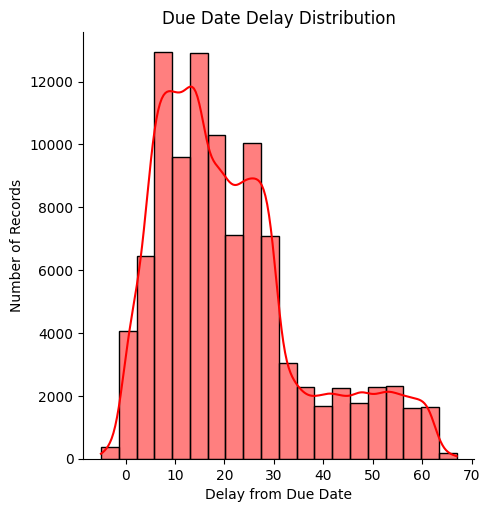

In [144]:
plt.figure(figsize=(10,5))
sns.displot(data = data, x= data['Delay_from_due_date'], kde= True, bins = 20, color = "red")
plt.xlabel('Delay from Due Date')
plt.ylabel('Number of Records')
plt.title('Due Date Delay Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary:**

- Delay from due date ranges from **5 day prior** to **67 days delayed**

**Column : Num_of_Delayed_Payment**

In [147]:
data['Num_of_Delayed_Payment'].isna().sum()

7002

In [148]:
data['Num_of_Delayed_Payment'].unique()

array(['25', '26', '23', '28', '18', '16', '1749', '19', '7', '8', '9',
       '15', '13', nan, '12', '17_', '10', '20', '22', '1', '5', '2',
       '11', '17', '15_', '14', '3', '4', '6', '21', '8_', '11_', '0',
       '2230', '24', '18_', '-2', '19_', '1636', '20_', '-1', '16_',
       '921', '9_', '1766', '21_', '12_', '6_', '1_', '25_', '0_', '-3',
       '1572', '5_', '14_', '3_', '3162', '27', '1034', '4211', '4_',
       '2712', '1832', '22_', '3251', '7_', '867', '13_', '4106', '3951',
       '2216', '24_', '10_', '2_', '1640', '2142_', '754', '974', '1180',
       '1359', '320', '2250', '3621', '2438', '531', '3738', '2566',
       '719', '4326', '223', '1833', '3881', '23_', '439', '1614', '3495',
       '960', '4075', '3119', '4302', '121', '2081', '3894', '3484',
       '2594', '4126', '3944', '2553', '1820', '819', '27_', '3629',
       '2080', '1480', '2801', '359', '94', '473', '2072', '2604', '306',
       '1633', '4262', '2488', '2008', '2955', '1647', '1691', '468',
 

In [149]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace('_', '')
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace('-', '')
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(float)

In [150]:
data['Num_of_Delayed_Payment'].value_counts().sort_values(ascending=True)

Num_of_Delayed_Payment
1668.0       1
2658.0       1
3458.0       1
439.0        1
531.0        1
          ... 
15.0      5237
10.0      5309
16.0      5312
17.0      5412
19.0      5481
Name: count, Length: 708, dtype: int64

In [151]:
data1 = data[pd.isna(data['Num_of_Delayed_Payment'])]
data1[['Customer_ID','Num_of_Loan','Num_Credit_Card','Num_of_Delayed_Payment']]

,Customer_ID,Num_of_Loan,Num_Credit_Card,Num_of_Delayed_Payment
26,CUS_0x1011,3,3,NaN
31,CUS_0x1011,3,3,NaN
33,CUS_0x1013,3,3,NaN
55,CUS_0x1018,8,7,NaN
66,CUS_0x102d,1,3,NaN
...,...,...,...,...
99935,CUS_0xfe3,4,5,NaN
99937,CUS_0xfe4,7,3,NaN
99942,CUS_0xfe4,7,3,NaN
99980,CUS_0xff6,2,6,NaN


In [152]:
grouped_modes = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.mode().iloc[0])
data['Num_of_Delayed_Payment'] = data.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Num_of_Delayed_Payment'] != grouped_modes[row['Customer_ID']] else row['Num_of_Delayed_Payment'], axis=1)

In [153]:
grouped_modes

Customer_ID
CUS_0x1000    25.0
CUS_0x1009    18.0
CUS_0x100b     7.0
CUS_0x1011    15.0
CUS_0x1013     9.0
              ... 
CUS_0xff3      9.0
CUS_0xff4     10.0
CUS_0xff6      4.0
CUS_0xffc     16.0
CUS_0xffd     12.0
Name: Num_of_Delayed_Payment, Length: 12500, dtype: float64

In [154]:
data['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
19.0    6392
10.0    6200
20.0    6184
16.0    6160
15.0    6032
8.0     5904
18.0    5760
17.0    5752
9.0     5744
12.0    5664
11.0    5368
14.0    3976
13.0    3752
1.0     2232
25.0    2208
5.0     2176
6.0     2160
21.0    2152
2.0     2136
23.0    2088
0.0     2056
22.0    2024
3.0     2000
7.0     1976
24.0    1968
4.0     1912
27.0       8
28.0       8
26.0       8
Name: count, dtype: int64

In [156]:
data['Num_of_Delayed_Payment'].isna().sum()

0

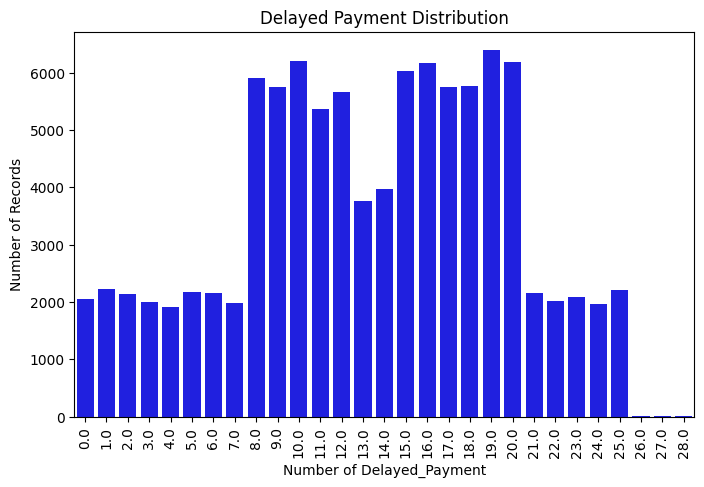

In [155]:
plt.figure(figsize=(8,5))
sns.countplot(data = data, x= data['Num_of_Delayed_Payment'], color = "blue")
plt.xlabel('Number of Delayed_Payment')
plt.ylabel('Number of Records')
plt.title('Delayed Payment Distribution')
plt.xticks(rotation=90)
plt.show()

**Summary:**

Delayed Payments frequency is high between **9 to 20 intervals**

**Column : Changed_Credit_Limit**

In [157]:
data['Changed_Credit_Limit'].dtypes

dtype('O')

In [159]:
data['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
_        2091
8.22      135
11.5      127
11.32     126
7.35      121
         ... 
-2.02       1
35.84       1
-4.88       1
-3.49       1
33.61       1
Name: count, Length: 3635, dtype: int64

In [160]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].str.replace('_', '')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].str.replace('-', '')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace('', '0')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)

In [161]:
grouped_modes = data.groupby('Customer_ID')['Changed_Credit_Limit'].apply(lambda x: x.mode().iloc[0])
data['Changed_Credit_Limit'] = data.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Changed_Credit_Limit'] != grouped_modes[row['Customer_ID']] else row['Changed_Credit_Limit'], axis=1)

In [162]:
data['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
8.22     152
11.50    152
11.32    144
7.69     136
7.35     136
        ... 
21.87      8
29.90      8
26.06      8
29.14      8
23.16      8
Name: count, Length: 2521, dtype: int64

<Figure size 800x500 with 0 Axes>

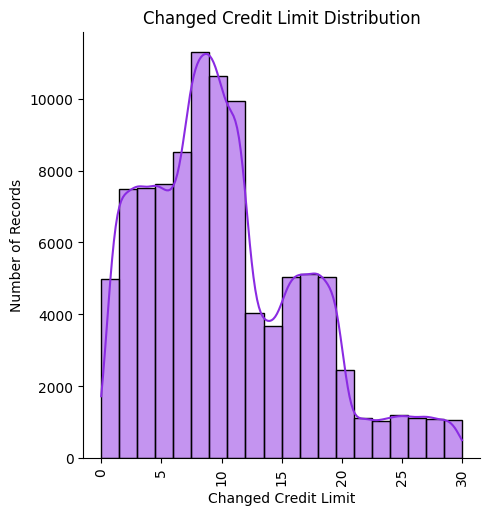

In [172]:
plt.figure(figsize=(8,5))
sns.displot(data= data, x=data['Changed_Credit_Limit'], kde=True, bins=20, color = "blueviolet")
plt.xlabel('Changed Credit Limit')
plt.ylabel('Number of Records')
plt.title('Changed Credit Limit Distribution')
plt.xticks(rotation=90)
plt.show()

**Column : Num_Credit_inquiries**

In [165]:
data['Num_Credit_Inquiries'].isna().sum()

1965

In [166]:
data['Num_Credit_Inquiries'].value_counts()

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
253.0         1
2352.0        1
2261.0        1
519.0         1
1801.0        1
Name: count, Length: 1223, dtype: int64

In [167]:
data2 = data[pd.isna(data['Num_Credit_Inquiries'])]
data2[['Customer_ID','Num_of_Loan','Num_Credit_Card','Num_Credit_Inquiries']]

,Customer_ID,Num_of_Loan,Num_Credit_Card,Num_Credit_Inquiries
55,CUS_0x1018,8,7,NaN
118,CUS_0x1041,9,8,NaN
161,CUS_0x1051,1,5,NaN
190,CUS_0x105b,0,4,NaN
235,CUS_0x107c,6,10,NaN
...,...,...,...,...
99847,CUS_0xfb4,4,6,NaN
99968,CUS_0xff4,5,7,NaN
99970,CUS_0xff4,5,7,NaN
99979,CUS_0xff6,2,6,NaN


In [168]:
grouped_modes = data.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.mode().iloc[0])
data['Num_Credit_Inquiries'] = data.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Num_Credit_Inquiries'] != grouped_modes[row['Customer_ID']] else row['Num_Credit_Inquiries'], axis=1)

In [169]:
data['Num_Credit_Inquiries'].value_counts()

Num_Credit_Inquiries
4.0     11936
3.0      9416
2.0      8568
7.0      8416
6.0      8264
8.0      8152
1.0      8104
0.0      7504
5.0      5728
9.0      5304
11.0     5280
10.0     5016
12.0     4592
13.0     1344
14.0      960
15.0      728
16.0      416
17.0      272
Name: count, dtype: int64

In [173]:
data['Num_Credit_Inquiries'].isna().sum()

0

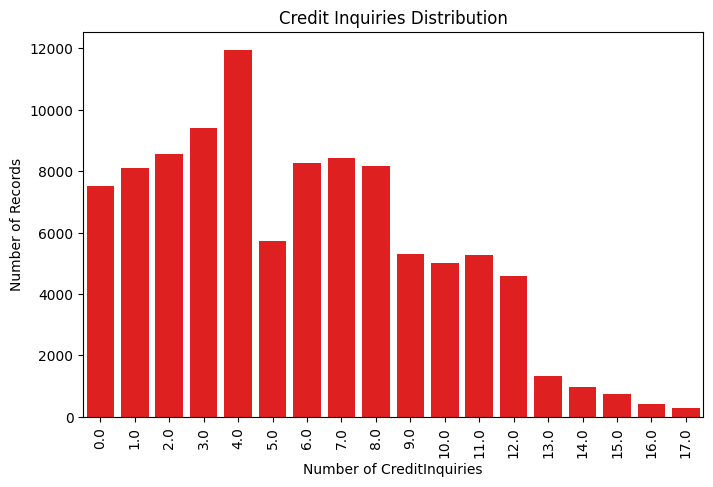

In [171]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x=data['Num_Credit_Inquiries'], color = "red")
plt.xlabel('Number of CreditInquiries')
plt.ylabel('Number of Records')
plt.title('Credit Inquiries Distribution')
plt.xticks(rotation=90)
plt.show()

**Column : Credit_mix**

In [174]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [175]:
data['Credit_Mix'] = data['Credit_Mix'].replace('_', np.nan)

In [176]:
data.sort_values(by=['Customer_ID', 'Month'], inplace=True)
data['Credit_Mix'] = data.groupby('Customer_ID')['Credit_Mix'].fillna(method='ffill').fillna(method='bfill')

In [177]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

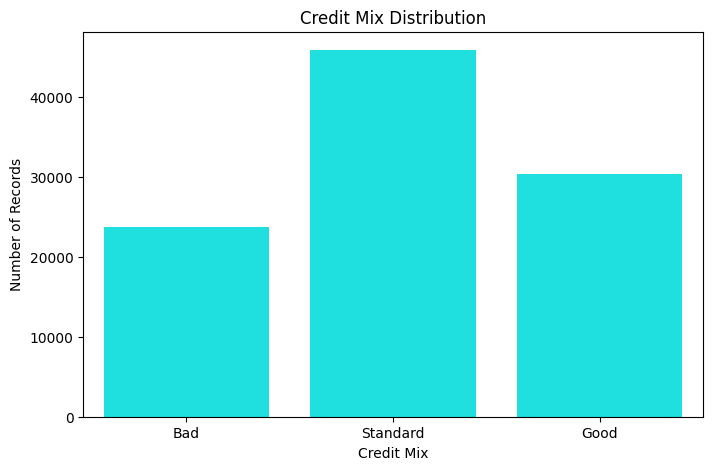

In [179]:
plt.figure(figsize=(8,5))
sns.countplot(data= data, x= data['Credit_Mix'], color = "aqua")
plt.xlabel('Credit Mix')
plt.ylabel('Number of Records')
plt.title('Credit Mix Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary:**

- There are 3 types of Credit Mix i.e **Bad, Good & Standard**.

**Column : Outstanding Debt**

In [180]:
data['Outstanding_Debt'].value_counts()

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
100.3       16
            ..
3530.13_     1
1181.44_     1
4078.71_     1
2362.56_     1
1799.87_     1
Name: count, Length: 13178, dtype: int64

In [181]:
data[['Customer_ID', 'Outstanding_Debt']]

,Customer_ID,Outstanding_Debt
0,CUS_0x1000,1562.91
1,CUS_0x1000,1562.91
2,CUS_0x1000,1562.91
3,CUS_0x1000,1562.91
4,CUS_0x1000,1562.91
...,...,...
99995,CUS_0xffd,1701.88
99996,CUS_0xffd,1701.88
99997,CUS_0xffd,1701.88
99998,CUS_0xffd,1701.88


In [182]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace('_', '')
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(float)

<Figure size 800x500 with 0 Axes>

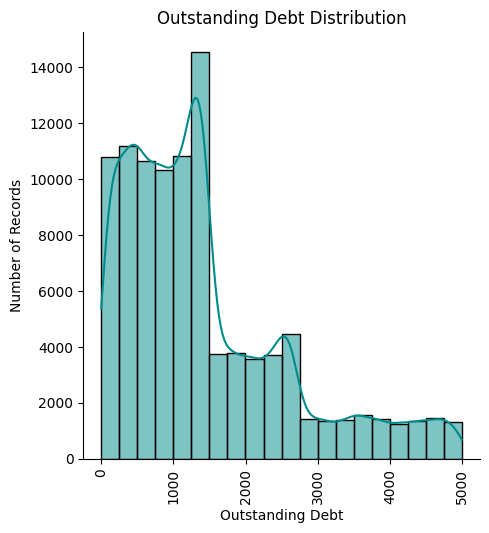

In [183]:
plt.figure(figsize=(8,5))
sns.displot(data= data, x=data['Outstanding_Debt'], kde=True, bins=20, color = "darkcyan")
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Records')
plt.title('Outstanding Debt Distribution')
plt.xticks(rotation=90)
plt.show()

**Column : Credit Utilization Ratio**

In [184]:
data['Credit_Utilization_Ratio'] =data['Credit_Utilization_Ratio'].round(2)

In [185]:
data['Credit_Utilization_Ratio'].value_counts()

Credit_Utilization_Ratio
32.52    86
36.70    84
29.13    83
31.05    83
29.01    82
         ..
47.29     1
45.27     1
45.70     1
43.80     1
46.28     1
Name: count, Length: 2478, dtype: int64

<Figure size 800x500 with 0 Axes>

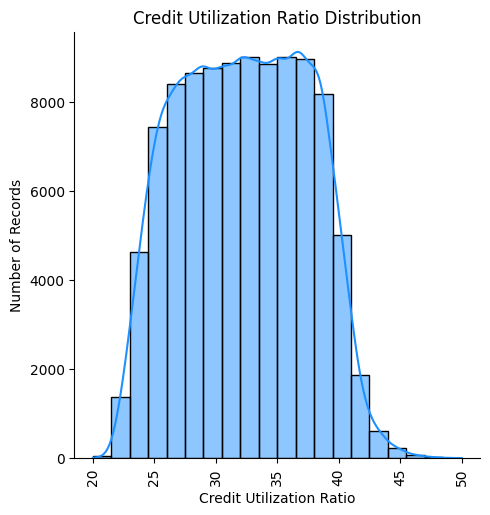

In [186]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x=df['Credit_Utilization_Ratio'], kde=True, bins=20, color = "dodgerblue")
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Number of Records')
plt.title('Credit Utilization Ratio Distribution')
plt.xticks(rotation=90)
plt.show()

**Column : Credit_history_Age**

In [187]:
data['Credit_History_Age'].isna().sum()

9030

In [188]:
data['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [189]:
grouped_modes = data.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.mode().iloc[0])
data['Credit_History_Age'] = data.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Credit_History_Age'] != grouped_modes[row['Customer_ID']] else row['Credit_History_Age'], axis=1)


In [190]:
data['Credit_History_Age'].isna().sum()

0

In [191]:
data3 = pd.DataFrame(data['Credit_History_Age'])

def convert_to_months(age_str):
    parts = age_str.split()
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

data['Credit_History_Age_Num'] = data['Credit_History_Age'].apply(lambda x: convert_to_months(x))

In [192]:
data[['Credit_History_Age','Credit_History_Age_Num']]

,Credit_History_Age,Credit_History_Age_Num
0,10 Years and 2 Months,122
1,10 Years and 2 Months,122
2,10 Years and 2 Months,122
3,10 Years and 2 Months,122
4,10 Years and 2 Months,122
...,...,...
99995,18 Years and 2 Months,218
99996,18 Years and 2 Months,218
99997,18 Years and 2 Months,218
99998,18 Years and 2 Months,218


In [193]:
data['Credit_History_Age_Num'].max()

397

In [194]:
data['Credit_History_Age_Num'].min()

1

<Figure size 800x500 with 0 Axes>

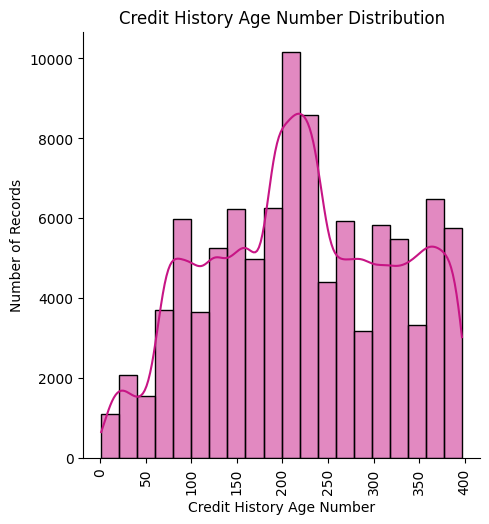

In [196]:
plt.figure(figsize=(8,5))
sns.displot(data=data, x=data['Credit_History_Age_Num'], kde=True, bins=20, color = "mediumvioletred")
plt.xlabel('Credit History Age Number')
plt.ylabel('Number of Records')
plt.title('Credit History Age Number Distribution')
plt.xticks(rotation=90)
plt.show()

**Summary:**

Converted the data from illogical way to analytical format for computation.

**Column : Payment_of_min_Amount**

In [197]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

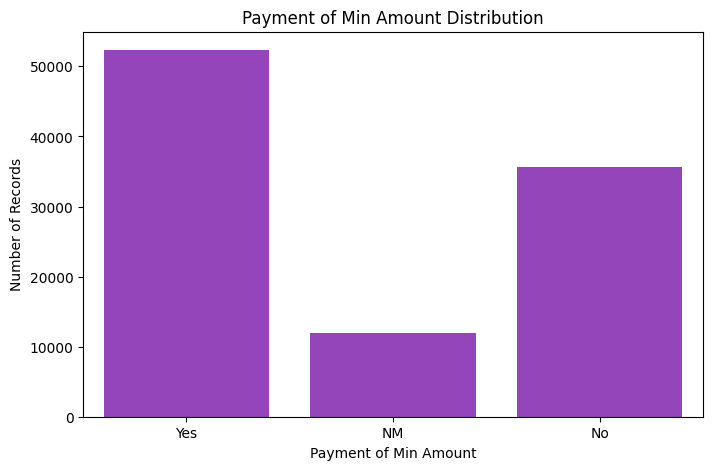

In [199]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x=data['Payment_of_Min_Amount'], color = "darkorchid")
plt.xlabel('Payment of Min Amount')
plt.ylabel('Number of Records')
plt.title('Payment of Min Amount Distribution')
plt.xticks(rotation=0)
plt.show()

**Column : Total_EMI_per_month**

In [200]:
data['Total_EMI_per_month'].value_counts()

Total_EMI_per_month
0.000000        10613
42.941090           8
72.798279           8
119.461755          8
263.655491          8
                ...  
39156.000000        1
26128.000000        1
75532.000000        1
78386.000000        1
22380.000000        1
Name: count, Length: 14950, dtype: int64

In [201]:
grouped_modes = data.groupby('Customer_ID')['Total_EMI_per_month'].apply(lambda x: x.mode().iloc[0])
data['Total_EMI_per_month'] = data.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Total_EMI_per_month'] != grouped_modes[row['Customer_ID']] else row['Total_EMI_per_month'], axis=1)

In [202]:
data['Total_EMI_per_month'].max()

1779.103254

In [203]:
data['Total_EMI_per_month'].min()

0.0

In [204]:
data['Total_EMI_per_month'].value_counts()

Total_EMI_per_month
0.000000      11072
42.941090         8
107.489365        8
78.047064         8
230.815449        8
              ...  
341.841495        8
400.386423        8
85.356930         8
61.845295         8
182.976650        8
Name: count, Length: 11117, dtype: int64

<Figure size 800x500 with 0 Axes>

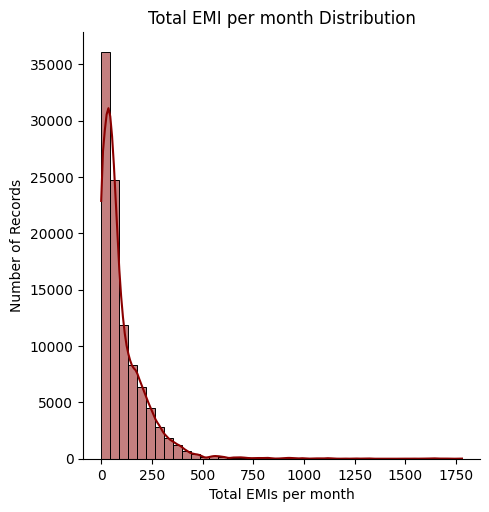

In [205]:
plt.figure(figsize=(8,5))
sns.displot(data=data, x=data['Total_EMI_per_month'], kde=True, bins=40, color = "darkred")
plt.xlabel('Total EMIs per month')
plt.ylabel('Number of Records')
plt.title('Total EMI per month Distribution')
plt.xticks(rotation=0)
plt.show()

**Column : Amount_invested_monthly**

In [206]:
data['Amount_invested_monthly'].isna().sum()

4479

In [207]:
data['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
__10000__      4305
0               169
87.90990881       1
459.5317247       1
752.475627        1
               ... 
105.7266479       1
138.9942681       1
289.9612607       1
76.53803865       1
104.6294735       1
Name: count, Length: 91049, dtype: int64

In [208]:
data['Amount_invested_monthly'] = pd.to_numeric(data['Amount_invested_monthly'], errors='coerce')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].replace(0, np.nan)
data['Amount_invested_monthly']

0         87.909909
1         77.314276
2        176.132567
3        244.750283
4        266.597160
            ...    
99995    195.529273
99996    257.989693
99997     47.007379
99998    336.130231
99999    104.629474
Name: Amount_invested_monthly, Length: 100000, dtype: float64

In [209]:
data[data['Amount_invested_monthly']==0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Num


In [210]:
data['Amount_invested_monthly'].isna().sum()

8953

In [211]:
mean_per_customer = data.groupby('Customer_ID')['Amount_invested_monthly'].mean()
mask = data['Amount_invested_monthly'].isna()
data.loc[mask, 'Amount_invested_monthly'] = data.loc[mask, 'Customer_ID'].map(mean_per_customer)

<Figure size 800x500 with 0 Axes>

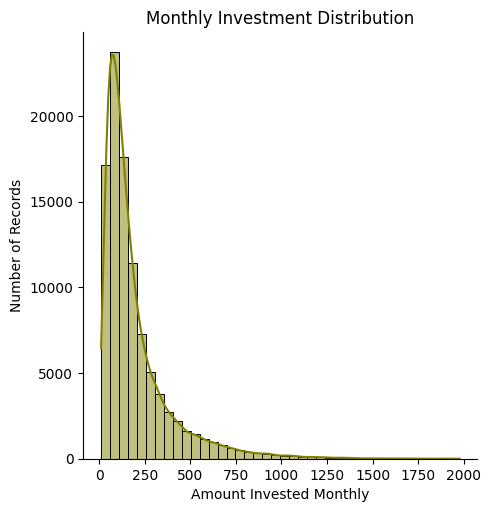

In [214]:
plt.figure(figsize=(8,5))
sns.displot(data=data, x=data['Amount_invested_monthly'], kde=True, bins=40, color = "olive")
plt.xlabel('Amount Invested Monthly')
plt.ylabel('Number of Records')
plt.title('Monthly Investment Distribution')
plt.xticks(rotation=0)
plt.show()

In [215]:
data['Amount_invested_monthly'].isna().sum()

0

In [216]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].round(2)

**Column : Payment_Behaviour**

In [217]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [219]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace('!@9#%8', np.nan)
data['Payment_Behaviour'] = data.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [220]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      27767
High_spent_Medium_value_payments    19366
High_spent_Large_value_payments     15348
Low_spent_Medium_value_payments     14621
High_spent_Small_value_payments     11980
Low_spent_Large_value_payments      10918
Name: count, dtype: int64

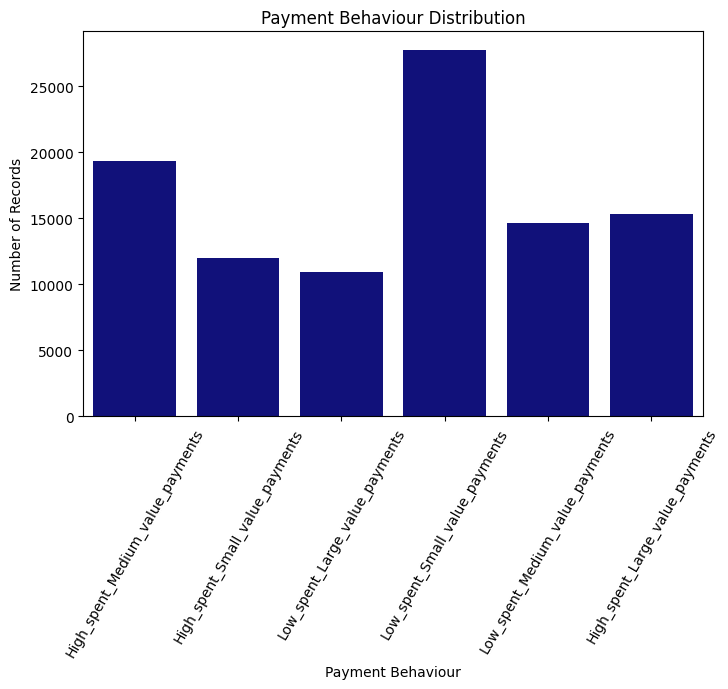

In [221]:
plt.figure(figsize=(8,5))
sns.countplot(data= data, x=data['Payment_Behaviour'], color = "darkblue")
plt.xlabel('Payment Behaviour')
plt.ylabel('Number of Records')
plt.title('Payment Behaviour Distribution')
plt.xticks(rotation=60)
plt.show()

**Column : Monthly_Balance**

In [222]:
data['Monthly_Balance'].isna().sum()

1200

In [223]:
data['Monthly_Balance'].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
350.0148691                         2
695.0571561                         2
419.7651674                         1
615.6677195                         1
                                   ..
259.3760946                         1
343.7619864                         1
288.6680278                         1
468.4784226                         1
337.380877                          1
Name: count, Length: 98790, dtype: int64

In [224]:
data['Monthly_Balance'].nunique()

98790

In [225]:
data['Monthly_Balance'] = data['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'], errors='coerce')
data['Monthly_Balance'] = data.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

In [226]:
data['Monthly_Balance'].value_counts()

Monthly_Balance
261.565962    5
464.392372    4
238.332338    4
215.181452    4
164.119697    4
             ..
319.503931    1
345.075800    1
338.115057    1
344.112554    1
337.380877    1
Name: count, Length: 99757, dtype: int64

In [229]:
data['Monthly_Balance'].isna().sum()

0

<Figure size 800x500 with 0 Axes>

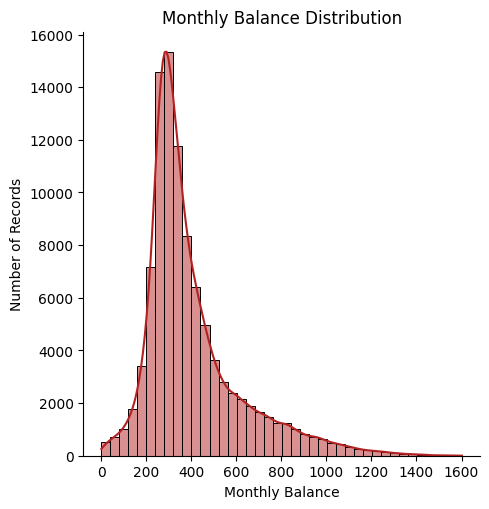

In [228]:
plt.figure(figsize=(8,5))
sns.displot(data= data, x= data['Monthly_Balance'], kde=True, bins=40, color = "firebrick")
plt.xlabel('Monthly Balance')
plt.ylabel('Number of Records')
plt.title('Monthly Balance Distribution')
plt.xticks(rotation=0)
plt.show()

**Heatmap: Correlation Check**

In [237]:
data_heatmap = data.select_dtypes(include = ['number'])

In [238]:
data_heatmap

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Num
0,17,30625.94,2706.161667,6,5,27,2,0,1,0,...,64,25.0,1.63,11.0,1562.91,32.84,42.94109,87.91,419.765167,122
1,17,30625.94,2706.161667,6,5,27,2,0,1,0,...,57,25.0,1.63,11.0,1562.91,30.08,42.94109,77.31,400.360800,122
2,17,30625.94,2706.161667,6,5,27,2,0,1,0,...,62,25.0,1.63,11.0,1562.91,29.44,42.94109,176.13,311.542510,122
3,17,30625.94,2706.161667,6,5,27,2,0,1,0,...,62,25.0,1.63,11.0,1562.91,26.61,42.94109,244.75,252.924793,122
4,17,30625.94,2706.161667,6,5,27,2,0,1,0,...,62,25.0,1.63,11.0,1562.91,38.15,42.94109,266.60,251.077916,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,29,41398.44,3749.870000,8,7,13,6,1,0,0,...,25,12.0,10.07,7.0,1701.88,29.51,182.97665,195.53,266.481077,218
99996,29,41398.44,3749.870000,8,7,13,6,1,0,0,...,23,12.0,10.07,7.0,1701.88,33.92,182.97665,257.99,194.020657,218
99997,29,41398.44,3749.870000,8,7,13,6,1,0,0,...,23,12.0,10.07,7.0,1701.88,36.97,182.97665,47.01,395.002972,218
99998,29,41398.44,3749.870000,8,7,13,6,1,0,0,...,25,12.0,10.07,7.0,1701.88,25.18,182.97665,336.13,145.880120,218


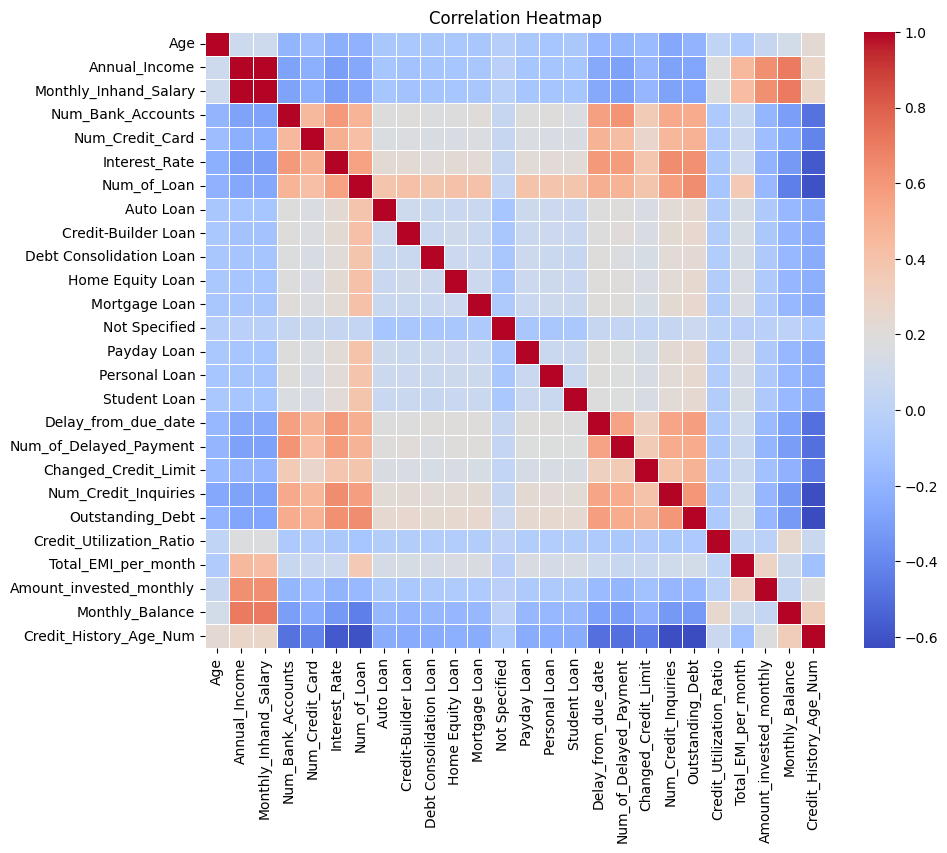

In [240]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_heatmap.corr(), cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Summary:**

- Strong positive correlation for features like Annual_Income, Monthly_Inhand_Salary, Monthly_Balance & Amount_Invested_Monthly.
- Positive Correlation can also be found among features like Num_Credit_inquiries, Outstanding_debt, Num_of_delayed_payment, Num_Bank_Account.
- Strong negative correlation can be found among Credit_history_age, Outstanding_debt, Num_of_loan, Interest_rate.

In [241]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.282000,10.766568,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4198.262107,3187.363227,303.645417,1626.594167,3096.066250,5957.715000,15204.633330
Num_Bank_Accounts,100000.0,5.411840,2.508237,1.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100000.0,5.532720,2.067504,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Auto Loan,100000.0,0.305600,0.460663,0.000000,0.000000,0.000000,1.000000,1.000000
Credit-Builder Loan,100000.0,0.317280,0.465420,0.000000,0.000000,0.000000,1.000000,1.000000
Debt Consolidation Loan,100000.0,0.310400,0.462660,0.000000,0.000000,0.000000,1.000000,1.000000


In [242]:
data.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1628d,1
Customer_ID,100000,12500,CUS_0x1000,8
Month,100000,8,April,12500
Name,100000,10139,Jessicad,48
SSN,100000,12500,913-74-1218,8
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6260,Not Specified,12816
Credit_Mix,100000,3,Standard,45848
Credit_History_Age,100000,249,15 Years and 10 Months,3488
Payment_of_Min_Amount,100000,3,Yes,52326


**Label Encoding Features**

In [243]:
data["Payment_of_Min_Amount"] = data["Payment_of_Min_Amount"].replace({"Yes": 1, "No": 0, "NM": 0})

In [244]:
data["Credit_Mix"] = data["Credit_Mix"].replace({"Standard": 1, "Good": 2, "Bad": 0})

In [245]:
data["Payment_Behaviour"] = data["Payment_Behaviour"].replace({
      "Low_spent_Small_value_payments": 1,
      "High_spent_Medium_value_payments": 2,
      "Low_spent_Medium_value_payments": 3,
      "High_spent_Large_value_payments": 4,
      "High_spent_Small_value_payments": 5,
      "Low_spent_Large_value_payments": 6
  })

**Summary:**

- Low_spent_Small_value_payments: 1
- High_spent_Small_value_payments: 2
- Low_spent_Medium_value_payments: 3
- High_spent_Medium_value_payments: 4
- Low_spent_Large_value_payments: 5
- High_spent_Large_value_payments: 6

This numeric representation captures the hierarchy where higher numbers represent higher spent value or larger payments.

**Feature Engineering**

1. Debt to Income Ratio:

In [246]:
data['Monthly_Debt_to_Income_Ratio'] = data['Outstanding_Debt'] / data['Monthly_Inhand_Salary']

2. Debt Repayment Capacity

In [248]:
data['Monthly_Debt_Repayment_Capacity'] = data['Monthly_Inhand_Salary'] - data['Total_EMI_per_month']

3. Payment History Score

In [249]:
data["Payment_History_Score"] = (
      - 1 * data["Delay_from_due_date"]
      - 1 * data["Num_of_Delayed_Payment"]
      + 1 * data["Payment_of_Min_Amount"]
  )

# **Credit Score Calculation:**

Selected features for credit score calulcation with their weights:

1. Payment history score
- Weight: 0.30
- Strongest predictor of future credit behavior.


2. Credit History Age in Months
- Weight: 0.20
- Longer credit history indicates responsible credit usage.Weighted moderately to reflect its significance.

3. Monthly Debt-to-Income Ratio (MDTIR)
- Weight: 0.15
- Lower ratio indicates better ability to manage debt.Weighted lower due to potential fluctuations in income.

4. Credit Utilization Ratio
- Weight: 0.10
- Lower ratio suggests responsible credit card usage.Weighted lower as it's a snapshot of current utilization.

5. Monthly Debt Repayment Capacity
- Weight: 0.05
- Reflects ability to manage existing debt.

6. Outstanding Debt
- Weight: 0.05
- Higher debt increases risk of default.

7. Num_Credit_Inquiries
- Weight: 0.05
- Fewer inquiries suggest lower credit-seeking behavior.

8. Payment Behaviour
- Weight: 0.05
- Insights into spending patterns and payment tendencies.

9. Credit Mix
- Weight: 0.05
- Taking different types of credit

# **Calculate & Calibrate Credit Score:**

In [253]:
def calculate_credit_score(data):

  #Group by Customer ID, handling month-level data and calculating scores
  grouped_data = data.groupby("Customer_ID").agg(
      Payment_History_Score           = ("Payment_History_Score", "mean"),
      Credit_History_Age_Num          = ("Credit_History_Age_Num", "max"),           #Use maximum history age
      Monthly_Debt_to_Income_Ratio    = ("Monthly_Debt_to_Income_Ratio", "mean"),
      Credit_Utilization_Ratio        = ("Credit_Utilization_Ratio", "mean"),
      Monthly_Debt_Repayment_Capacity = ("Monthly_Debt_Repayment_Capacity",'mean'),
      Outstanding_Debt                = ("Outstanding_Debt", "mean"),
      Num_Credit_Inquiries            = ("Num_Credit_Inquiries", "sum"),
      Payment_Behaviour               = ("Payment_Behaviour","mean"),               #Use average payment behaviour encoding
      Credit_Mix                      = ("Credit_Mix","mean")
  )

  #Standardize values for numerical features
  grouped_data = (grouped_data - grouped_data.mean()) / grouped_data.std()

  # Calculate weighted scores
  grouped_data["credit_score"] = (
      0.30 * grouped_data["Payment_History_Score"]
      + 0.20 * grouped_data["Credit_History_Age_Num"]
      + 0.15 * (1-grouped_data["Monthly_Debt_to_Income_Ratio"]) #Inverse relation as lower the value better the financials
      + 0.10 * (1-grouped_data["Credit_Utilization_Ratio"]) #inverse relation
      + 0.05 * grouped_data["Monthly_Debt_Repayment_Capacity"]
      + 0.05 * grouped_data["Outstanding_Debt"]
      + 0.05 * (1-grouped_data["Num_Credit_Inquiries"]) #Inverse relation
      + 0.05 * grouped_data["Payment_Behaviour"]
      + 0.05 * grouped_data["Credit_Mix"]
  )

  #Normalize scores to a range of 0 to 100
  grouped_data["credit_score"] = (grouped_data["credit_score"] - grouped_data["credit_score"].min()) / (grouped_data["credit_score"].max() - grouped_data["credit_score"].min()) * 100

  #Map scores to the original FICO scale (300 to 850)
  min_range, max_range = 300, 850
  grouped_data["credit_score"] = (grouped_data["credit_score"] * (max_range - min_range) / 100) + min_range

  return grouped_data.reset_index()


  # Calculate scores for all customers
credit_scores_data = calculate_credit_score(data)
credit_scores_data[["Customer_ID","credit_score"]]

,Customer_ID,credit_score
0,CUS_0x1000,495.215414
1,CUS_0x1009,765.188490
2,CUS_0x100b,725.966507
3,CUS_0x1011,678.701861
4,CUS_0x1013,731.596559
...,...,...
12495,CUS_0xff3,682.252337
12496,CUS_0xff4,687.775950
12497,CUS_0xff6,799.658279
12498,CUS_0xffc,561.434848


# **Customer with Highest Credit Score:**

In [255]:
max_value = credit_scores_data['credit_score'].max()

In [259]:
credit_scores_data[credit_scores_data['credit_score'] == max_value].T

,5701
Customer_ID,CUS_0x65bf
Payment_History_Score,1.45596
Credit_History_Age_Num,1.745692
Monthly_Debt_to_Income_Ratio,-0.617335
Credit_Utilization_Ratio,-0.53696
Monthly_Debt_Repayment_Capacity,2.484007
Outstanding_Debt,-0.796567
Num_Credit_Inquiries,-1.222183
Payment_Behaviour,1.033527
Credit_Mix,1.27412


**Customer with Lowest Credit Score:**

In [257]:
min_value = credit_scores_data['credit_score'].min()

In [260]:
credit_scores_data[credit_scores_data['credit_score'] == min_value].T

,8310
Customer_ID,CUS_0x8c6f
Payment_History_Score,-1.830869
Credit_History_Age_Num,-1.507828
Monthly_Debt_to_Income_Ratio,10.03639
Credit_Utilization_Ratio,-0.798419
Monthly_Debt_Repayment_Capacity,-1.22304
Outstanding_Debt,1.971018
Num_Credit_Inquiries,2.696945
Payment_Behaviour,-1.124135
Credit_Mix,-1.454655


# **Insights & Takeaways:**



1. Unique Customers: 12500
2. Data information of Customer profile is available between Jan to Aug i.e. only for 8 months
3. Various type of Loans availed by customers were -
  - Auto Loan
  - Credit-Builder Loan
  - Debt Consolidation Loan
  - Home Equity Loan
  - Mortgage Loan
  - Payday Loan
  - Personal Loan
  - Student Loan
  - Unspecified Loan
4. Most customers have a low annual income and distribution is right skewed.
5. Most customers have a low monthly income and distribution is right skewed.
6. Majority of customers has no. of bank accounts between 3 to 8.
7. Number of credit cards range from 0 to 11 with most of the customers having credit cards in the range of 3 to 7 with peak at 5.
8. Interest rate is spread across 1% to 34%.
9. Very few customers invest greater than 2k amount per month.
10. Customers typically take anywhere from 2 to 4 loans, with the maximum number being 9.
11. Typically, most customers belong to the Low_spent_small_value_payments and High_spent_medium-value_payments.
12. Minimum Credit history is 1 month with highest as 397.


**For credit score calculation we have used following features with their respective weights**

1. Payment histroy score: (Weight: 0.30)
2. Credit History Age in Months (Weight: 0.20)
3. Monthly Debt-to-Income Ratio (MDTIR) (Weight: 0.15)
4. 4redit Utilization Ratio (Weight: 0.10)
5. Monthly Debt Repayment Capacity (Weight: 0.05)
6. Outstanding Debt (Weight: 0.05)
7. Num_Credit_Inquiries (Weight: 0.05)
8. Payment Behaviour (Weight: 0.05)
9. Credit_mix (Weight: 0.05)


# **Recommendations:**

- The current credit score model uses a basic set of factors to calculate scores. To enhance reliability, we can delve into adjusting the importance of each factor through various weighting schemes. For example, we might assign more weight to factors that have a stronger impact on creditworthiness, such as payment history and credit utilization. This way, the model can better reflect the nuances of individual financial behavior.

- Consider expanding the set of features used for credit score calculation. This could involve incorporating alternative data sources such as social media behavior, rental payment history, or utility bill payments. Experimenting with new features can provide a more comprehensive and accurate representation of an individual's financial responsibility and creditworthiness.

- Engage with domain experts, such as credit analysts and financial professionals, to gain insights into the nuances of creditworthiness. Their expertise can guide the selection of features, model design, and interpretation of results, ultimately improving the reliability of the credit score.